In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

import datetime
from datetime import date
from datetime import datetime

### Descripcion Basica del data set

In [285]:
data = pd.read_csv('ted_main.csv')   #leo del archivo subido localmente en colab
data.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520


In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [287]:
data.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


#Explorar el dataset

###Explorando Languages:

- Languages tiene correlacion positiva con Views

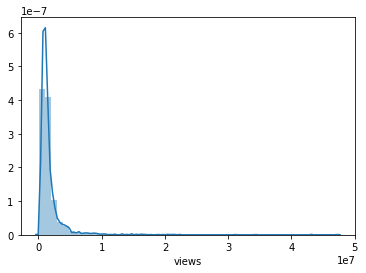

In [288]:
#ver views
sns.distplot(data['views'])

In [289]:
data['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

In [0]:
col = data['views']

In [0]:
col = np.log(col)

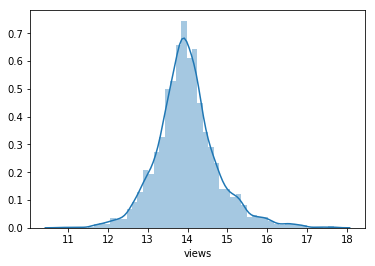

In [292]:
sns.distplot(col)

In [293]:
# create a new column of log of views

data['views_log'] = np.log(data['views'])
data.head(2) 

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,17.670479
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,14.978824


Text(0.5, 0, 'Number of Languages')

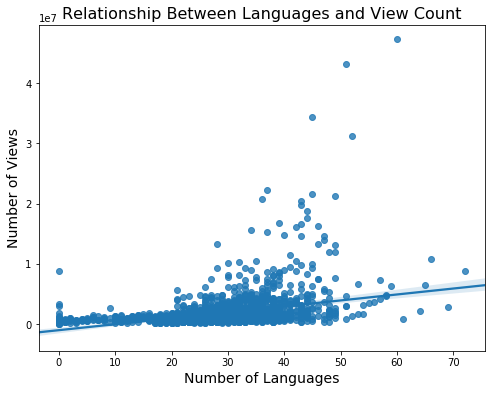

In [294]:
#Languages vs. View Count
f, ax = plt.subplots(figsize = (8,6))
sns.regplot(data=data,x='languages',y='views')
plt.title("Relationship Between Languages and View Count", fontsize = 16)
plt.ylabel("Number of Views", fontsize = 14)
plt.xlabel("Number of Languages", fontsize = 14)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


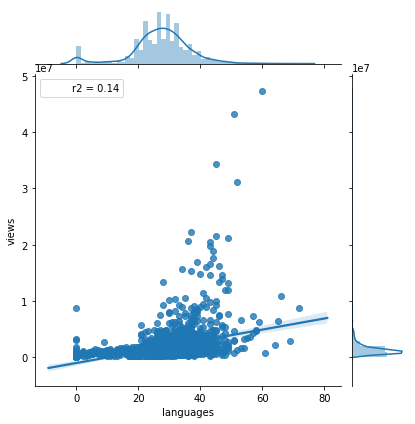

In [295]:
#from scipy import stats
x=data['languages']
y=data['views']
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


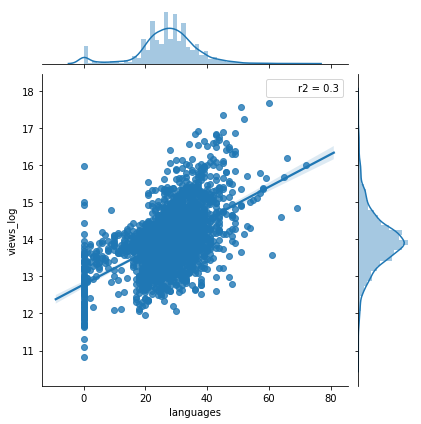

In [296]:
x=data['languages']
y=data['views_log']
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

Text(0.5, 0, 'Number of Languages')

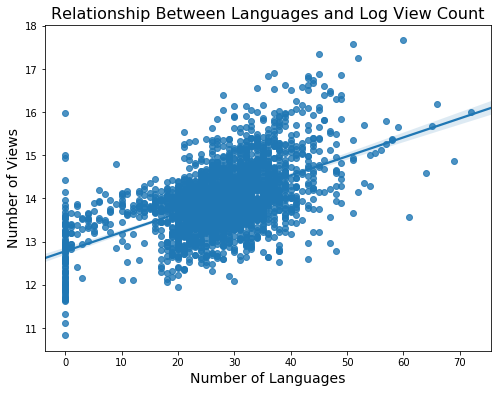

In [297]:
#Languages vs. log of View Count
f, ax = plt.subplots(figsize = (8,6))
sns.regplot(data=data,x='languages',y='views_log')
plt.title("Relationship Between Languages and Log View Count", fontsize = 16)
plt.ylabel("Number of Views", fontsize = 14)
plt.xlabel("Number of Languages", fontsize = 14)

### Explorando comments

*   Si bien tiene relacion, no deberia ser considerado para predecir en el futuro por no contar con el dato de la variable al momento de publicacion



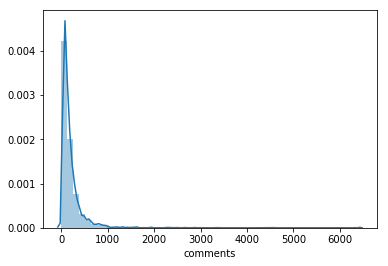

In [298]:
#ver comments
sns.distplot(data['comments'])

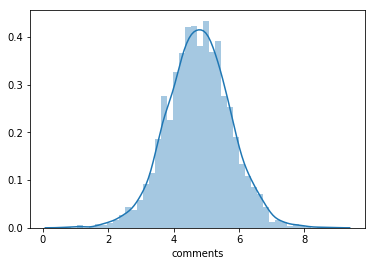

In [299]:
# pruebo con el logaritmo --> parece tener pocos valores "extremos"
col = data['comments']
col = np.log(col)
sns.distplot(col)

In [300]:
data['comments'].describe()   #se verifica lo que se en el chart. media 191, desvio 282 ... y valores max de 6k

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

Text(0.5, 0, 'Number of Languages')

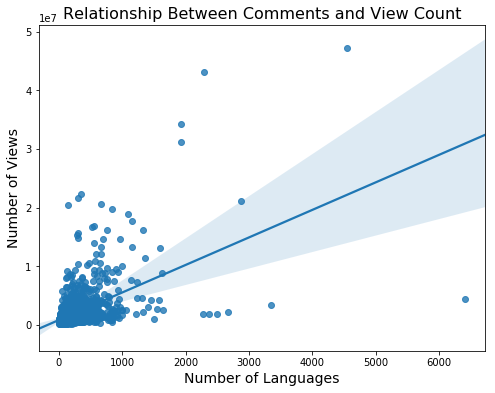

In [301]:
#Comments vs. View Count
f, ax = plt.subplots(figsize = (8,6))
sns.regplot(data=data,x='comments',y='views')
plt.title("Relationship Between Comments and View Count", fontsize = 16)
plt.ylabel("Number of Views", fontsize = 14)
plt.xlabel("Number of Languages", fontsize = 14)

In [302]:
# create a new column of log of comments

data['comments_log'] = np.log(data['comments'])
data.head(2) 

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log,comments_log
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,17.670479,8.423542
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,14.978824,5.579730


Text(0.5, 0, 'Number of Languages')

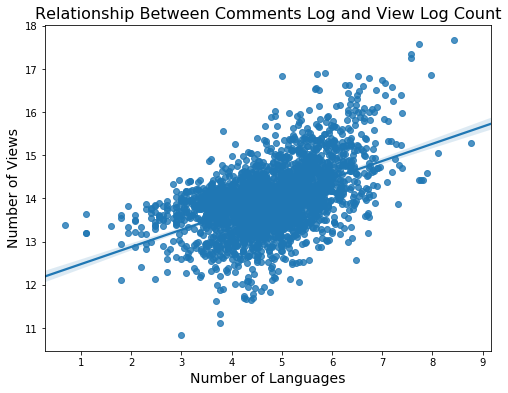

In [303]:
#Log de:   Comments vs. View Count
f, ax = plt.subplots(figsize = (8,6))
sns.regplot(data=data,x='comments_log',y='views_log')
plt.title("Relationship Between Comments Log and View Log Count", fontsize = 16)
plt.ylabel("Number of Views", fontsize = 14)
plt.xlabel("Number of Languages", fontsize = 14)

### Explorando Published date

*   Semana vs Fin_De_Semana corta views

Nota:A Unix timestamp is the number of seconds between a particular date and January 1, 1970 at UTC. 

In [0]:
#import datetime

In [305]:
# creamos nueva variable con otro formato de dia publicado

data['published_date_read'] = pd.to_datetime(data['published_date'],unit='s')
data.head(2) 

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log,comments_log,published_date_read
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,17.670479,8.423542,2006-06-27 00:11:00
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,14.978824,5.579730,2006-06-27 00:11:00


In [306]:
#agregamos una variable con el dia de la semana de publicacion
data['published_wkday'] = pd.to_datetime(data['published_date'],unit='s').dt.dayofweek
data.head(2) 
# Verificando: el June 27, 2006 fue martes

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log,comments_log,published_date_read,published_wkday
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,17.670479,8.423542,2006-06-27 00:11:00,1
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,14.978824,5.579730,2006-06-27 00:11:00,1


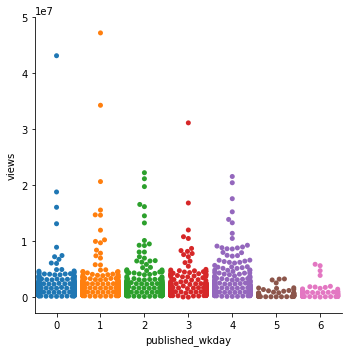

In [307]:
sns.catplot(x='published_wkday', y='views', data=data, kind="swarm")

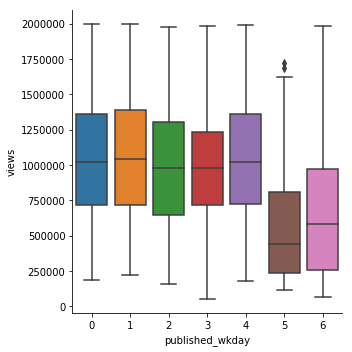

In [308]:
sns.catplot(x="published_wkday", y="views", kind="box", data=data.query("views < 2000000"))  #si tomamos menos de 2 millones de views

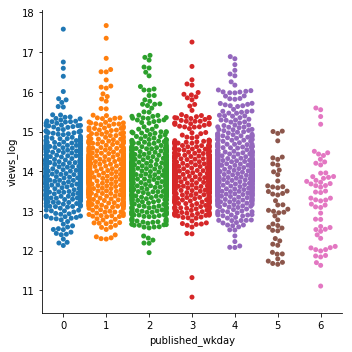

In [309]:
sns.catplot(x='published_wkday', y='views_log', data=data, kind="swarm")

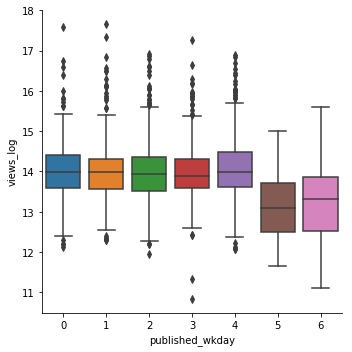

In [310]:
sns.catplot(x="published_wkday", y="views_log", kind="box", data=data) 

###Explorando Cantidad de dias online ("Aging"):

- Cantidad de dias online tiene correlacion positiva con Views // era lo q esperaba pero no me da eso -->hay q revisar codigo, muchas conversiones de fechas que quizas hice mal

NOTAS: 
-El data set es hasta septiembre 21 2017

In [311]:
#recuerdo la estructura del dataset
data.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log,comments_log,published_date_read,published_wkday
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,17.670479,8.423542,2006-06-27 00:11:00,1
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,14.978824,5.579730,2006-06-27 00:11:00,1


In [312]:
#chequeo el data type del feature de published_date_read
type(data['published_date_read'][0])


pandas._libs.tslibs.timestamps.Timestamp

In [313]:
# create a new column of log of views


# creo una lista convirtiendo del formato timestamp a datetim
published_date_Age = []
for i in range(2550):
  dummy = datetime.date(data['published_date_read'][i])
  published_date_Age.append(dummy)
  
#agrego columna al dataset
data['published_date_Age'] = published_date_Age
data.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log,comments_log,published_date_read,published_wkday,published_date_Age
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,17.670479,8.423542,2006-06-27 00:11:00,1,2006-06-27
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,14.978824,5.579730,2006-06-27 00:11:00,1,2006-06-27


In [315]:
#fijamos la fecha de creacion del dataset

import datetime
DataSet_date = datetime.date(2017, 9, 23)
DataSet_date

datetime.date(2017, 9, 23)

In [316]:
#calculamos la edad del dataset
data['published_date_Age'] = DataSet_date - data['published_date_Age'] 
data.tail(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log,comments_log,published_date_read,published_wkday,published_date_Age
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309,12.946363,3.465736,2017-09-21 20:00:42,3,2 days
2549,8,With more than half of the world population li...,519,TED2017,1492992000,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,1506092422,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,12.878305,2.079442,2017-09-22 15:00:22,4,1 days


In [0]:
#convierto los dias a numero
data['published_date_Age'] = pd.to_timedelta(data.published_date_Age, errors='coerce').dt.days


In [318]:
#chequeo tipo de dato
type(data['published_date_Age'][0])

numpy.int64

In [323]:
data.tail(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log,comments_log,published_date_read,published_wkday,published_date_Age
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309,12.946363,3.465736,2017-09-21 20:00:42,3,2
2549,8,With more than half of the world population li...,519,TED2017,1492992000,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,1506092422,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,12.878305,2.079442,2017-09-22 15:00:22,4,1


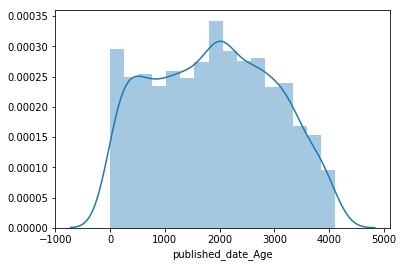

In [320]:
#ver aging de publicacioj
sns.distplot(data['published_date_Age'])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


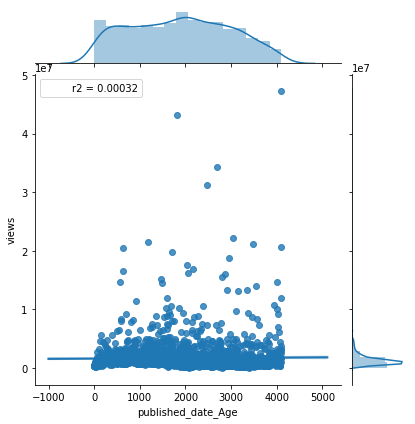

In [321]:
#ver aging con views

x=data['published_date_Age']
y=data['views']
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


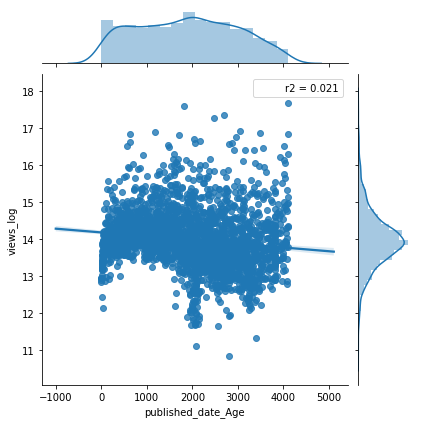

In [322]:
#ver aging con log de views
x=data['published_date_Age']
y=data['views_log']
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)